<a href="https://colab.research.google.com/github/Enriquebadenas/work_in_progress/blob/main/Copia_Juande_Datos_sonda_DQO.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Conversión fichero con datos sonda DQO portátil a Excel, by Enrique Badenas

In [ ]:
# Load basic libraries
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.axes
import datetime as dt

Primero has arrastrar el fichero con los datos, al que previamente le has cambiado la extensión "*****.hcot" por "datos_sonda.csv".
Despliega pinchando en el icono carpeta de la izquierda y arrastra el archivo "datos_sonda.csv" desde tu explorador a la zona de la izquierda, debajo de sample_data.

In [ ]:
# Cargamos los datos
df = pd.read_csv('/content/datos_sonda.csv') #modifica a partir de content/el_nombre_de_tu_archivo

# Obtén la cantidad de columnas en el DataFrame
num_columns = df.shape[1]
print(df.shape) # Será tu número de filas y columnas
print(df)

(1011, 13)
      #LO  CHOVI^  #TI  13:23:11  #DA  25Enero24  #PA     UVT  #VA  \
0     #LO  CHOVI^  #TI  13:23:11  #DA  25Enero24  #PA     TSS  #VA   
1     #LO  CHOVI^  #TI  13:23:11  #DA  25Enero24  #PA     UVA  #VA   
2     #LO  CHOVI^  #TI  13:23:11  #DA  25Enero24  #PA     DQO  #VA   
3     #LO  CHOVI^  #TI  13:23:11  #DA  25Enero24  #PA     COD  #VA   
4     #LO  CHOVI^  #TI  13:23:11  #DA  25Enero24  #PA     COT  #VA   
...   ...     ...  ...       ...  ...        ...  ...     ...  ...   
1006  #LO  CHOVI^  #TI  13:38:26  #DA  25Enero24  #PA     DBO  #VA   
1007  #LO  CHOVI^  #TI  13:38:26  #DA  25Enero24  #PA     IRA  #VA   
1008  #LO  CHOVI^  #TI  13:38:26  #DA  25Enero24  #PA     IRT  #VA   
1009  #LO  CHOVI^  #TI  13:38:26  #DA  25Enero24  #PA  UVARaw  #VA   
1010  #LO  CHOVI^  #TI  13:38:26  #DA  25Enero24  #PA  UVTRaw  #VA   

           67.55  #UN     %  Unnamed: 12  
0       0.135000  #UN  mg/L          NaN  
1       0.170383  #UN   ABS          NaN  
2     831.799377  #

In [ ]:
# Asigna nombres a las columnas usando una lista de nombres generados
nombres_columnas = [f'col_{i}' for i in range(1, num_columns + 1)]
df.columns = nombres_columnas

# Mapea nombres de meses en español a inglés
meses_mapping = {
    'Enero': 'January',
    'Febrero': 'February',
    'Marzo': 'March',
    'Abril': 'April',
    'Mayo': 'May',
    'Junio': 'June',
    'Julio': 'July',
    'Agosto': 'August',
    'Septiembre': 'September',
    'Octubre': 'October',
    'Noviembre': 'November',
    'Diciembre': 'December'
}

# Aplica el mapeo a la columna col_6
df['col_6'] = df['col_6'].replace(meses_mapping, regex=True)

# Combina las columnas col_4 y col_6 para formar una cadena de fecha y hora
df['timestamp_str'] = df['col_6'] + df['col_4']

# Convierte la cadena en un objeto de fecha y hora
df['timestamp'] = pd.to_datetime(df['timestamp_str'], format='%d%B%y%H:%M:%S')

# Cambia el formato de la fecha en el DataFrame a 'dd-mm-yyyy'
df['formatted_timestamp'] = df['timestamp'].dt.strftime('%d-%m-%Y %H:%M:%S')

# Pivotea el DataFrame
df_pivot = df.pivot(index='formatted_timestamp', columns=['col_8', 'col_12'], values='col_10')

# Resetea el índice
df_pivot.reset_index(inplace=True)

# Guarda el DataFrame en un archivo Excel
df_pivot.to_excel('Datos_sonda.xlsx', engine='openpyxl')
print(df_pivot)

col_8   formatted_timestamp    TSS       UVA          DQO        COD  \
col_12                        mg/L       ABS         mg/L       mg/L   
0       25-01-2024 13:23:11  0.135  0.170383   831.799377   6.815319   
1       25-01-2024 13:23:22  0.146  0.175949   858.972168   7.037958   
2       25-01-2024 13:23:31  0.156  0.181458   885.864441   7.258298   
3       25-01-2024 13:23:41  0.162  0.185572   905.951355   7.422880   
4       25-01-2024 13:23:52  0.165  0.189355   924.421997   7.574219   
..                      ...    ...       ...          ...        ...   
87      25-01-2024 13:37:46  0.609  0.543763  2654.616455  21.750505   
88      25-01-2024 13:37:56  0.723  0.550189  2685.991211  22.007572   
89      25-01-2024 13:38:06  0.723  0.556787  2718.199951  22.271473   
90      25-01-2024 13:38:17  0.723  0.566701  2766.600342  22.668039   
91      25-01-2024 13:38:26  0.058  0.635068  3100.363525  25.402718   

col_8         COT        DBO    IRA    IRT UVARaw UVTRaw    UVT

Ahora te ha generado un fichero Excel con los datos recogidos por la sonda, que se llamará "Datos_sonda.slsx".
Si sobre ese fichero excel nuevo generado, pinchas sobre los tres puntitos a su derecha se desplegará un menú, selecciona descargar y tendrás el fichero Excel en tu carpeta Descargas.

# Y ya que hemos cargado los datos, hagamos unos gráficos rápidos.....

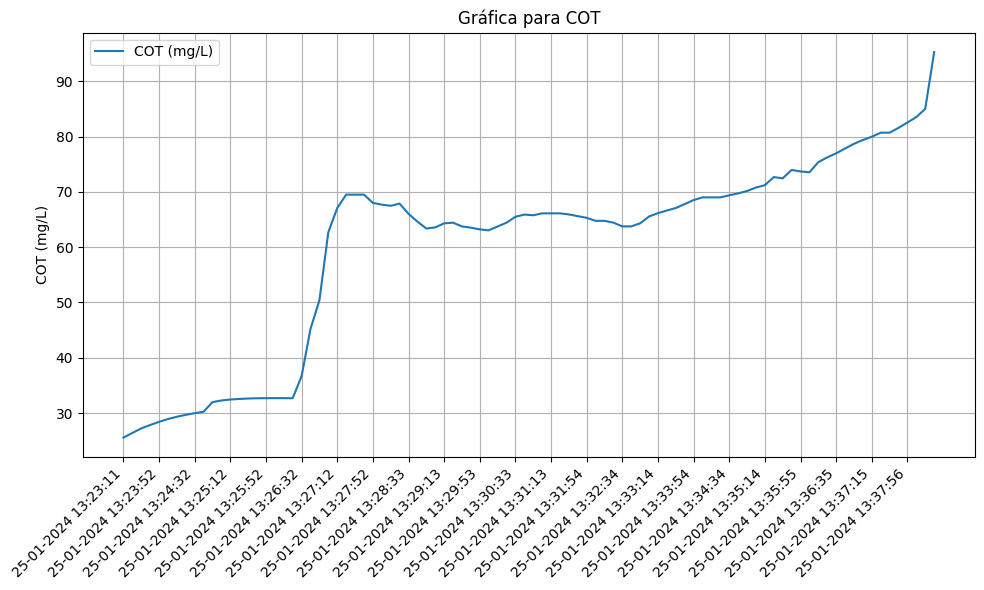

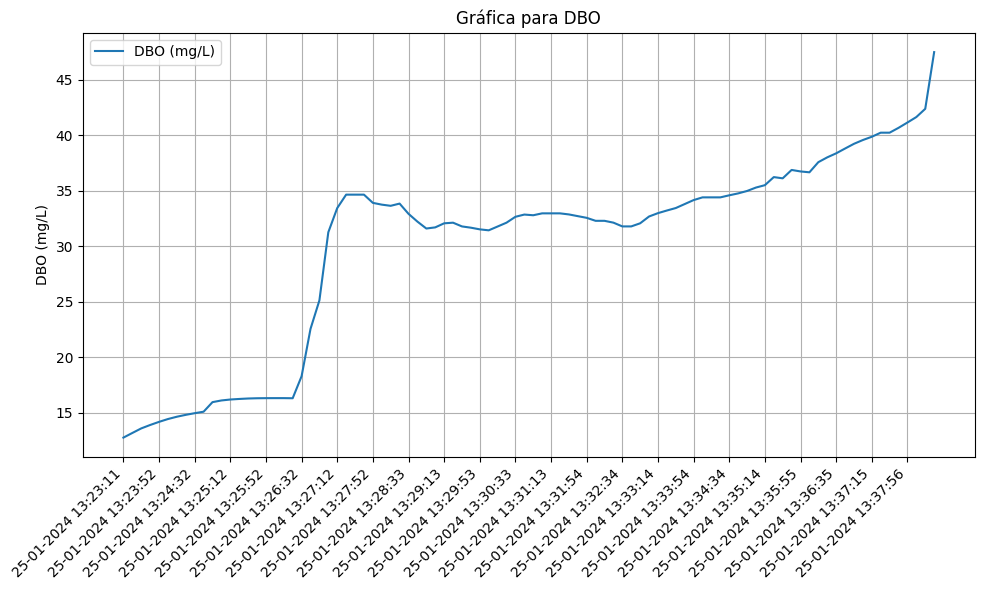

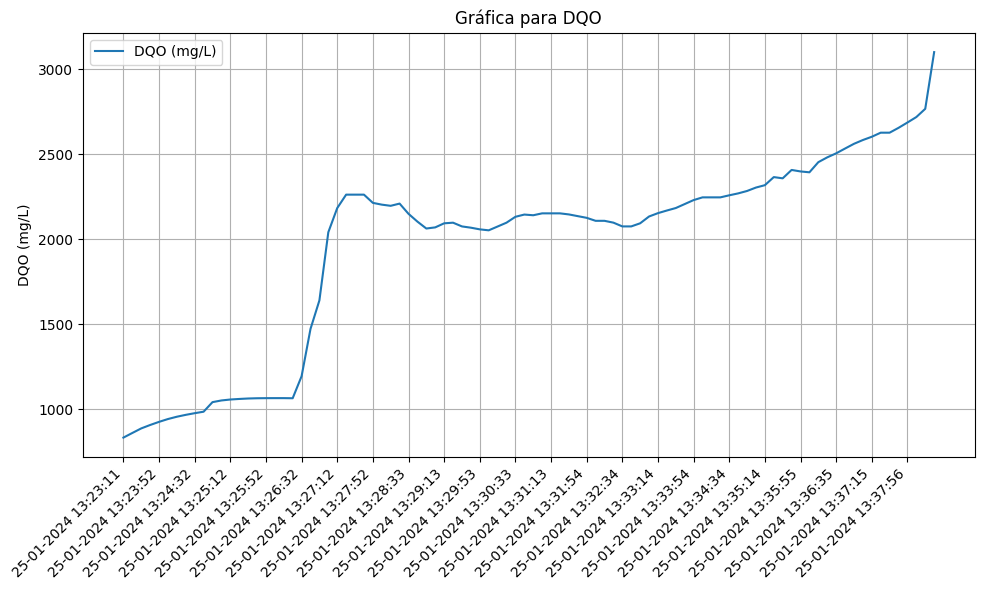

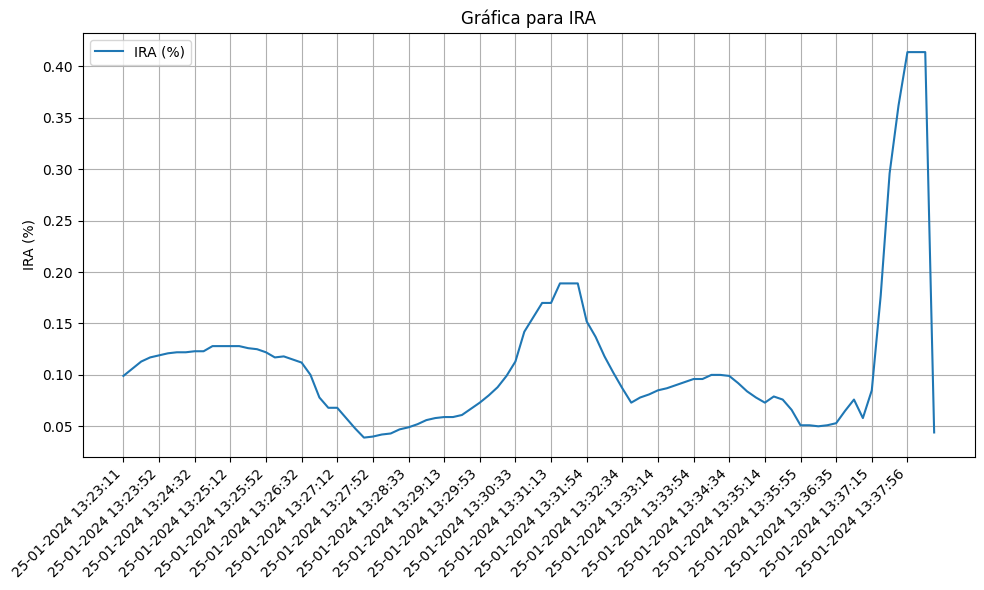

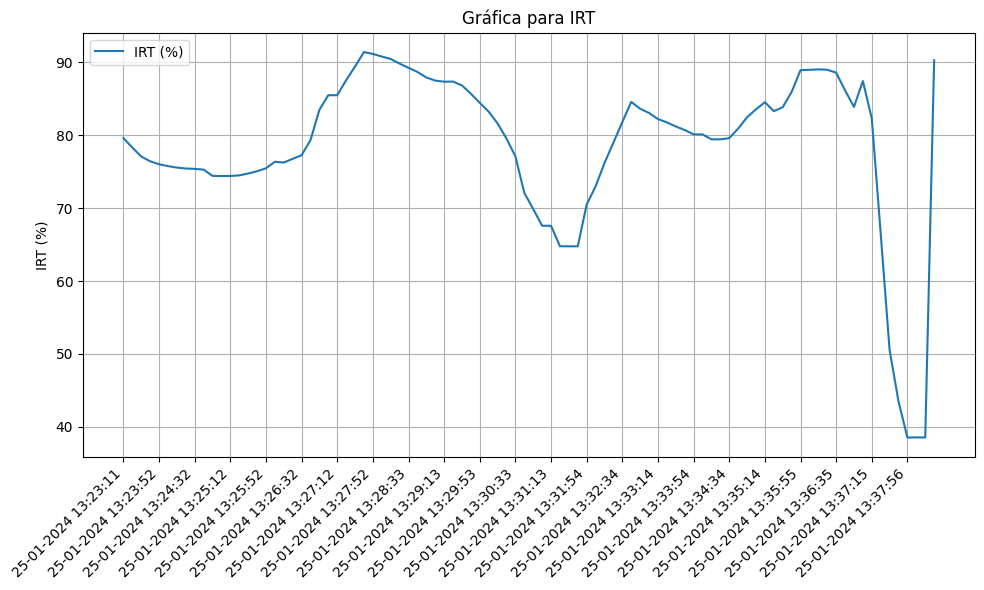

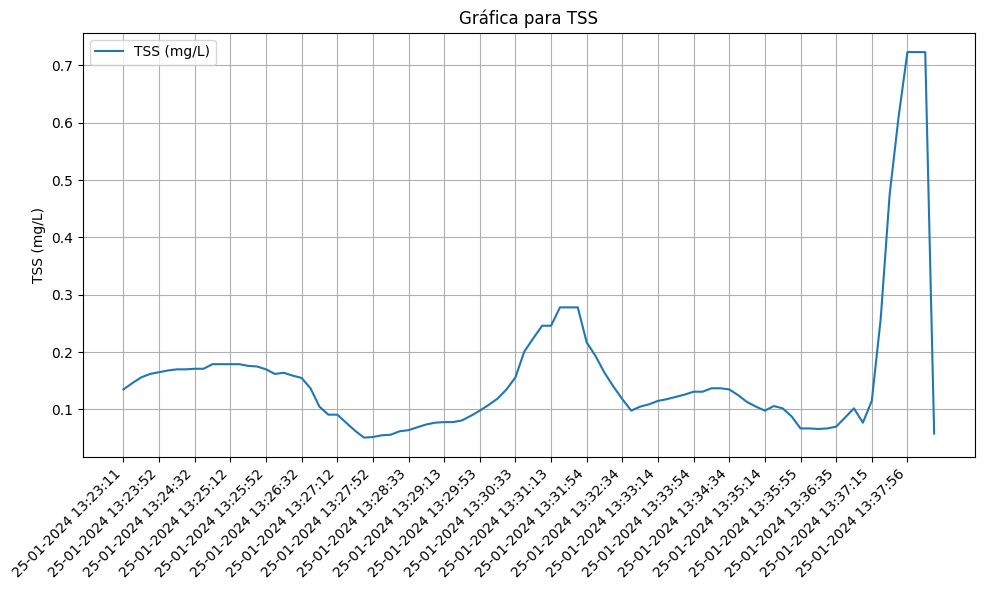

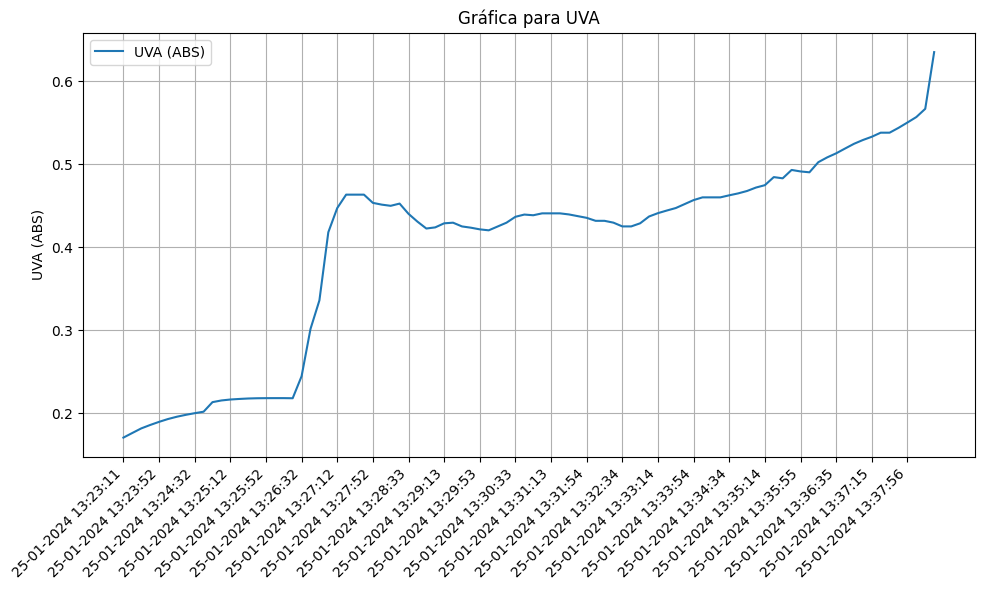

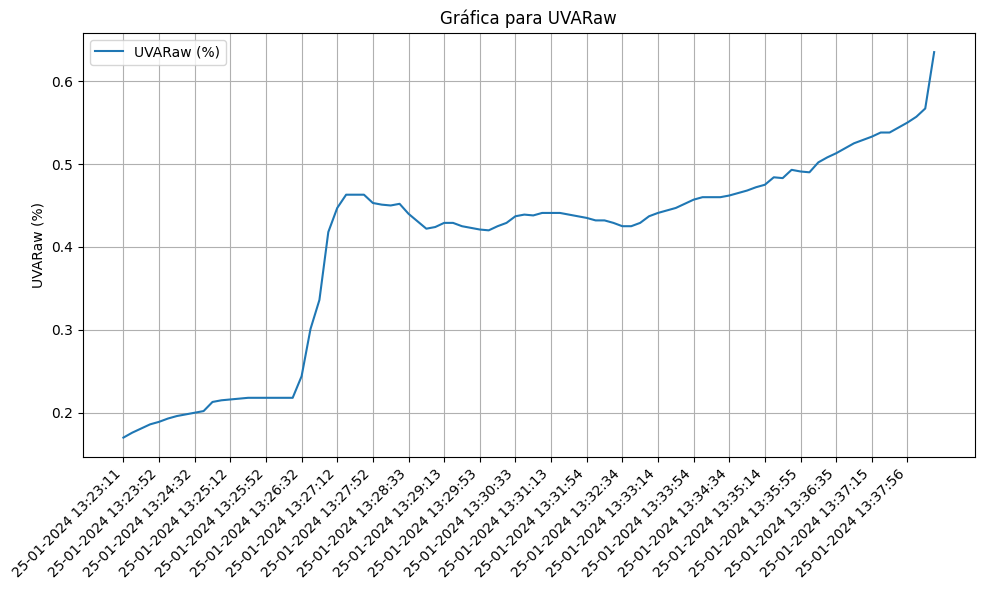

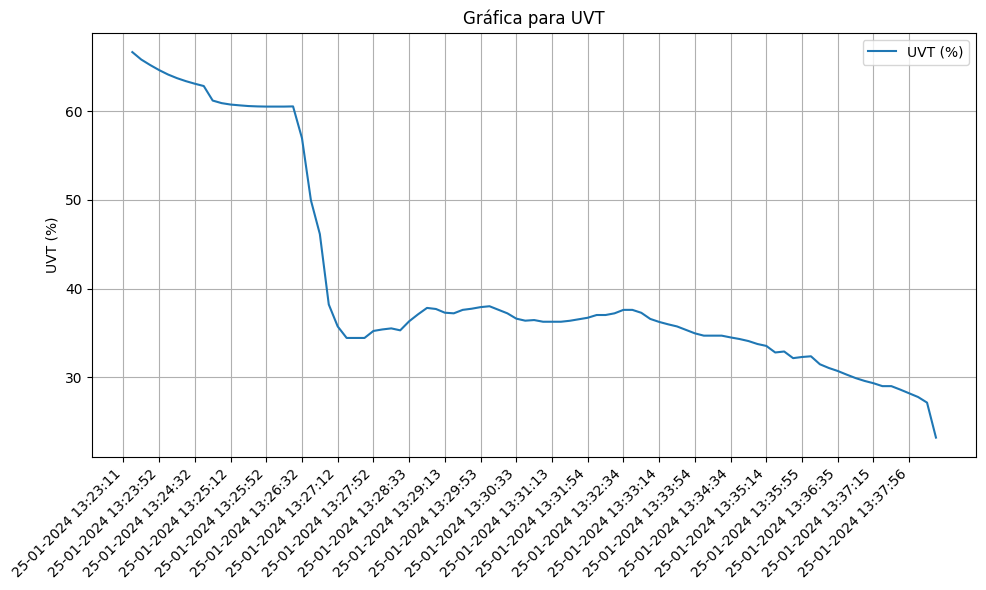

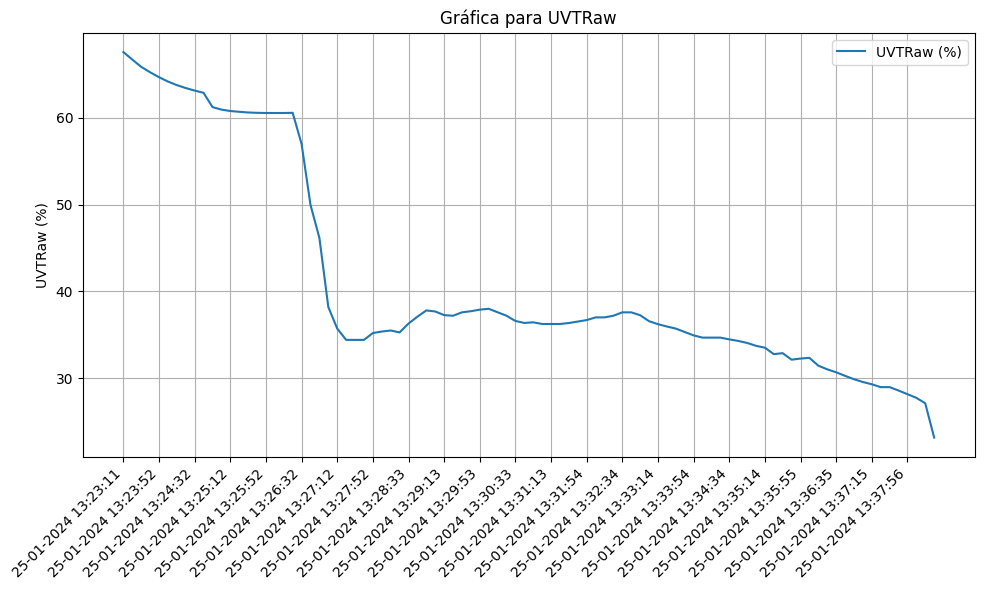

AttributeError: 'Series' object has no attribute 'columns'

<Figure size 1000x600 with 0 Axes>

In [ ]:
columns_to_plot = df_pivot.columns.levels[0][1:]

# Iteramos sobre las columnas
for col in columns_to_plot:
    plt.figure(figsize=(10, 6))

    # Iteramos sobre las unidades
    for unit in df_pivot[col].columns:
        plt.plot(df_pivot['formatted_timestamp'], df_pivot[col][unit], label=f'{col} ({unit})')

    # Añadimos etiquetas y leyenda
    #plt.xlabel('Fecha')
    plt.ylabel(f'{col} ({unit})')
    plt.title(f'Gráfica para {col}')
    plt.legend()
    plt.xticks(rotation=45, ha='right', ticks=df_pivot['formatted_timestamp'][::4]) #modifica este último valor para cambiar eje X si sale muy apretado
    plt.grid()
    plt.tight_layout()
    plt.show()


In [ ]:
# Cálculo de las medias horarias de cada parámetro

# Obtenemos la hora de cada registro
df_pivot['hour'] = pd.to_datetime(df_pivot['formatted_timestamp']).dt.hour

# Agrupamos los datos por hora
grouped_df = df_pivot.groupby('hour')

# Calculamos la media de cada parámetro
means = grouped_df.mean(numeric_only=True)  # Convertir en numerico para evitar el FutureWarning

# Eliminamos la primera columna
means = means.drop(columns=['formatted_timestamp'], level=0)

# Añadimos la columna dd-mm-yyyy
means['dd-mm-yyyy'] = pd.to_datetime(df['formatted_timestamp']).dt.strftime('%d-%m-%Y')

# Mostramos los resultados
print(means)

# Guarda el DataFrame en un archivo Excel
means.to_excel('Datos_sonda_horarios.xlsx', engine='openpyxl')

col_8        TSS       UVA          DQO       COD        COT        DBO  \
col_12      mg/L       ABS         mg/L      mg/L       mg/L       mg/L   
hour                                                                      
13      0.158978  0.402602  1965.478807  16.10408  60.390301  30.114631   

col_8        IRA        IRT    UVARaw     UVTRaw        UVT  dd-mm-yyyy  
col_12         %          %         %          %          %              
hour                                                                     
13      0.110272  78.577174  0.402587  41.118913  40.828462  25-01-2024  


<ipython-input-38-72dd21237861>:8: PerformanceWarning: dropping on a non-lexsorted multi-index without a level parameter may impact performance.
  means = grouped_df.mean(numeric_only=True)  # Convertir en numerico para evitar el FutureWarning
